# Financial Performance Analysis with TOPSIS and CRITIC methods 

   TOPSIS and CRITIC methods are one of the Multi-Criteria Decision Making (MCDM) methods. The TOPSIS and CRITIC methods consist of the following stages:

TOPSIS method
- Creation of decision matrix
- Finding the standard decision matrix (normalized matrix)
- Creation of weighted standard decision matrix using CRITIC method
- Finding Positive Ideal and Negative Ideal values (minimum and maximum values)
- Finding the distance values to the Positive Ideal and Negative Ideal values
- Obtaining TOPSIS performance 

CRITIC method
- Formulation of decision matrix
- Normalization of the input matrix
- Estimation of standard deviation for the normalized matrix
- Establish Symmetric matrix – Linear correlation coefficient between the Criteria,  Measure of the conflict created by criterion
- Estimation of Criterion information Cj 
- Measure of the conflict created by criterion, Weights

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df2016 = pd.read_excel('/content/drive/MyDrive/Datasets/Yeni/2016 - Copy.xlsx')
df2016.head()

,Kuruluşlar,ROA,ROE,ÖzKaynaklar / Toplam Varlıklar,Finansal Kaldıraç Oranı,Finansman Oranı,VÖK / Aktif toplam,Net faiz gelirleri/Toplam Aktifler,Faiz Karşılama Oranı
0,"""Azerbaycan Mikro Kredit"" A.Ş.",0.022,0.074,0.295,0.705,0.419,0.027,0.154,0.625
1,"""TCF Kredit"" A.Ş.",0.026,0.349,0.076,0.924,0.082,0.034,0.131,0.598
2,"""Azmikroinvest"" A.Ş.",0.027,0.058,0.474,0.526,0.903,0.041,0.133,4.021
3,"""EmbaFinans"" A.Ş.",0.049,0.084,0.586,0.414,1.418,0.061,0.171,1.423
4,"""Brand Kredit"" A.Ş.",0.005,0.035,0.152,0.848,0.179,0.005,0.112,0.041


In [3]:
df2017 = pd.read_excel('/content/drive/MyDrive/Datasets/Yeni/2017 - Copy.xlsx')
df2017.head()

,Kuruluşlar,ROA,ROE,Öz Kaynaklar / Toplam Varlıklar,Finansal Kaldıraç Oranı,Finansman Oranı,VÖK / Aktif toplam,Net faiz gelirleri/Toplam Aktifler,Faiz Karşılama Oranı
0,"""Azerbaycan Mikro Kredit"" A.Ş.",0.032,0.043,0.740,0.260,2.852,0.040,0.212,1.113
1,"""TCF Kredit"" A.Ş.",-0.061,-1.475,0.041,0.959,0.043,-0.061,0.037,-0.863
2,"""Azmikroinvest"" A.Ş.",0.044,0.080,0.549,0.451,1.218,0.055,0.139,3.762
3,"""EmbaFinans"" A.Ş.",0.026,0.044,0.583,0.417,1.398,0.032,0.145,0.599
4,"""Brand Kredit"" A.Ş.",-0.112,-1.331,0.084,0.916,0.092,-0.112,0.177,-0.635


In [4]:
df2018 = pd.read_excel('/content/drive/MyDrive/Datasets/Yeni/2018 - Copy.xlsx')
df2018.head()

,Kuruluşlar,ROA,ROE,Öz Kaynaklar / Toplam Varlıklar,Finansal Kaldıraç Oranı,Finansman Oranı,VÖK / Aktif toplam,Net faiz gelirleri/Toplam Aktifler,Faiz Karşılama Oranı
0,"""Azerbaycan Mikro Kredit"" A.Ş.",0.018,0.021,0.862,0.138,6.269,0.025,0.201,0.867
1,"""TCF Kredit"" A.Ş.",-0.198,-2.949,0.067,0.933,0.072,-0.198,0.112,-0.745
2,"""Azmikroinvest"" A.Ş.",0.026,0.039,0.669,0.331,2.018,0.033,0.112,4.297
3,"""EmbaFinans"" A.Ş.",0.062,0.129,0.478,0.522,0.917,0.078,0.152,1.823
4,"""Brand Kredit"" A.Ş.",0.027,0.135,0.197,0.803,0.245,0.027,0.143,0.151


In [5]:
df2019 = pd.read_excel('/content/drive/MyDrive/Datasets/Yeni/2019 - Copy.xlsx')
df2019.head()

,Kuruluşlar,ROA,ROE,Öz Kaynaklar / Toplam Varlıklar,Finansal Kaldıraç Oranı,Finansman Oranı,VÖK / Aktif toplam,Net faiz gelirleri/Toplam Aktifler,Faiz Karşılama Oranı
0,"""Azerbaycan Mikro Kredit"" A.Ş.",0.0002,0.0003,0.859,0.141,6.088,0.003,0.187,0.110
1,"""TCF Kredit"" A.Ş.",-0.1810,-1.7680,0.102,0.898,0.114,-0.181,0.027,-26.300
2,"""Azmikroinvest"" A.Ş.",0.0340,0.0380,0.902,0.098,9.255,0.044,0.179,8.175
3,"""EmbaFinans"" A.Ş.",0.0770,0.2040,0.379,0.621,0.609,0.099,0.185,1.959
4,"""Brand Kredit"" A.Ş.",0.0020,0.0100,0.181,0.819,0.222,0.002,0.217,0.021


In [6]:
df2020 = pd.read_excel('/content/drive/MyDrive/Datasets/Yeni/2020 - Copy.xlsx')
df2020.head()

,Kuruluşlar,ROA,ROE,Öz Kaynaklar / Toplam Varlıklar,Finansal Kaldıraç Oranı,Finansman Oranı,VÖK / Aktif toplam,Net faiz gelirleri/Toplam Aktifler,Faiz Karşılama Oranı
0,"""Azerbaycan Mikro Kredit"" A.Ş.",-0.249,-0.330,0.754,0.246,3.058,-0.311,0.240,-7.478
1,"""TCF Kredit"" A.Ş.",0.028,0.542,0.052,0.948,0.054,0.028,0.128,0.717
2,"""Azmikroinvest"" A.Ş.",0.094,0.101,0.936,0.064,14.584,0.119,0.196,116.851
3,"""EmbaFinans"" A.Ş.",0.082,0.180,0.458,0.542,0.844,0.110,0.232,1.807
4,"""Brand Kredit"" A.Ş.",0.107,0.259,0.413,0.587,0.704,0.118,0.260,5.546


In [7]:
df2016

,Kuruluşlar,ROA,ROE,ÖzKaynaklar / Toplam Varlıklar,Finansal Kaldıraç Oranı,Finansman Oranı,VÖK / Aktif toplam,Net faiz gelirleri/Toplam Aktifler,Faiz Karşılama Oranı
0,"""Azerbaycan Mikro Kredit"" A.Ş.",0.022,0.074,0.295,0.705,0.419,0.027,0.154,0.625
1,"""TCF Kredit"" A.Ş.",0.026,0.349,0.076,0.924,0.082,0.034,0.131,0.598
2,"""Azmikroinvest"" A.Ş.",0.027,0.058,0.474,0.526,0.903,0.041,0.133,4.021
3,"""EmbaFinans"" A.Ş.",0.049,0.084,0.586,0.414,1.418,0.061,0.171,1.423
4,"""Brand Kredit"" A.Ş.",0.005,0.035,0.152,0.848,0.179,0.005,0.112,0.041
5,"""FinEx Kredit"" A.Ş.",0.016,0.082,0.198,0.802,0.247,0.021,0.109,0.347
6,"""MM Finca Azerbaycan"" A.Ş.",-0.443,3.301,-0.134,1.134,-0.118,-0.368,-0.388,-1.838
7,"""Finoko"" A.Ş.",0.021,0.157,0.131,0.869,0.151,0.039,0.121,0.411
8,"""İDEAL Kredit"" A.Ş.",0.038,0.131,0.289,0.711,0.407,0.049,0.140,0.721
9,"""FinDev"" A.Ş.",-0.821,-10.009,0.082,0.918,0.089,-0.810,-0.623,-5.950


In [8]:
# Splitting into Numerical and Categorical variables
df1=df2016._get_numeric_data()
df2=df2016.drop(df2016._get_numeric_data(), axis=1)

In [9]:
df1

,ROA,ROE,ÖzKaynaklar / Toplam Varlıklar,Finansal Kaldıraç Oranı,Finansman Oranı,VÖK / Aktif toplam,Net faiz gelirleri/Toplam Aktifler,Faiz Karşılama Oranı
0,0.022,0.074,0.295,0.705,0.419,0.027,0.154,0.625
1,0.026,0.349,0.076,0.924,0.082,0.034,0.131,0.598
2,0.027,0.058,0.474,0.526,0.903,0.041,0.133,4.021
3,0.049,0.084,0.586,0.414,1.418,0.061,0.171,1.423
4,0.005,0.035,0.152,0.848,0.179,0.005,0.112,0.041
5,0.016,0.082,0.198,0.802,0.247,0.021,0.109,0.347
6,-0.443,3.301,-0.134,1.134,-0.118,-0.368,-0.388,-1.838
7,0.021,0.157,0.131,0.869,0.151,0.039,0.121,0.411
8,0.038,0.131,0.289,0.711,0.407,0.049,0.140,0.721
9,-0.821,-10.009,0.082,0.918,0.089,-0.810,-0.623,-5.950


In [10]:
df2

,Kuruluşlar
0,"""Azerbaycan Mikro Kredit"" A.Ş."
1,"""TCF Kredit"" A.Ş."
2,"""Azmikroinvest"" A.Ş."
3,"""EmbaFinans"" A.Ş."
4,"""Brand Kredit"" A.Ş."
5,"""FinEx Kredit"" A.Ş."
6,"""MM Finca Azerbaycan"" A.Ş."
7,"""Finoko"" A.Ş."
8,"""İDEAL Kredit"" A.Ş."
9,"""FinDev"" A.Ş."


In [11]:
# Normalization
df_n = np.array(df1/np.sqrt((df1**2).sum()))
df_n

array([[ 0.02060317,  0.00453381,  0.27048004,  0.22312445,  0.19524807,
         0.02649007,  0.1729296 ,  0.06625339],
       [ 0.0243492 ,  0.02138241,  0.06968299,  0.29243545,  0.03821084,
         0.03335787,  0.14710245,  0.06339125],
       [ 0.02528571,  0.00355352,  0.43460183,  0.16647299,  0.42078523,
         0.04022567,  0.14934829,  0.42624783],
       [ 0.04588888,  0.00514648,  0.53729256,  0.13102627,  0.66076794,
         0.05984794,  0.19201923,  0.15084572],
       [ 0.00468254,  0.00214437,  0.13936599,  0.26838232,  0.08341147,
         0.00490557,  0.12576698,  0.00434622],
       [ 0.01498412,  0.00502395,  0.18154254,  0.25382384,  0.11509851,
         0.02060339,  0.12239822,  0.03678388],
       [-0.41487294,  0.20224451, -0.12286212,  0.35889805, -0.05498633,
        -0.36104989, -0.43569276, -0.19483798],
       [ 0.01966666,  0.00961902,  0.12011148,  0.27502858,  0.07036386,
         0.03826344,  0.13587326,  0.04356823],
       [ 0.0355873 ,  0.00802606

In [12]:
# Multiply by the coefficient ('CRITIC' method)
a = []
for i in df1.columns:
    if i=='Finansal Kaldıraç Oranı':
        a.append((df1[i].max()-df1[i])/(df1[i].max()-df1[i].min()))
    else:
        a.append((df1[i]-df1[i].min())/(df1[i].max()-df1[i].min()))
df = pd.DataFrame(a).T
df_crc = (df.std()*(1-df.corr()).sum())/(df.std()*(1-df.corr()).sum()).sum()
for i in range(len(df_n)):
    df_n[i]=df_n[i]*df_crc
print(df_crc)
df_n

ROA                                   0.110840
ROE                                   0.165863
ÖzKaynaklar / Toplam Varlıklar        0.127138
Finansal Kaldıraç Oranı               0.127138
Finansman Oranı                       0.144975
VÖK / Aktif toplam                    0.107668
Net faiz gelirleri/Toplam Aktifler    0.112812
Faiz Karşılama Oranı                  0.103567
dtype: float64


array([[ 0.00228365,  0.00075199,  0.03438825,  0.02836757,  0.02830612,
         0.00285213,  0.01950851,  0.00686166],
       [ 0.00269886,  0.00354654,  0.00885935,  0.03717962,  0.00553962,
         0.00359157,  0.0165949 ,  0.00656523],
       [ 0.00280266,  0.0005894 ,  0.05525435,  0.02116502,  0.06100341,
         0.00433101,  0.01684826,  0.04414515],
       [ 0.00508631,  0.00085361,  0.06831023,  0.0166584 ,  0.09579494,
         0.0064437 ,  0.02166205,  0.01562262],
       [ 0.00051901,  0.00035567,  0.01771869,  0.03412155,  0.01209259,
         0.00052817,  0.01418801,  0.00045012],
       [ 0.00166084,  0.00083329,  0.02308093,  0.03227062,  0.01668643,
         0.00221832,  0.01380797,  0.00380959],
       [-0.04598441,  0.03354482, -0.01562043,  0.04562953, -0.00797165,
        -0.03887349, -0.04915131, -0.02017876],
       [ 0.00217985,  0.00159544,  0.01527072,  0.03496654,  0.01020101,
         0.00411974,  0.01532812,  0.00451222],
       [ 0.00394449,  0.00133122

In [13]:
# Ideal and Negative Ideal weight
ideal, neg_ideal=df_n.max(axis=0), df_n.min(axis=0)
z = pd.DataFrame({'ideal':ideal,'neg_ideal':neg_ideal}, index=df1.columns)
z['ideal']['Finansal Kaldıraç Oranı'],z['neg_ideal']['Finansal Kaldıraç Oranı']=z['neg_ideal']['Finansal Kaldıraç Oranı'],z['ideal']['Finansal Kaldıraç Oranı']
z

,ideal,neg_ideal
ROA,0.005086,-0.085222
ROE,0.033545,-0.123316
ÖzKaynaklar / Toplam Varlıklar,0.068310,-0.015620
Finansal Kaldıraç Oranı,0.016658,0.045630
Finansman Oranı,0.095795,-0.007972
VÖK / Aktif toplam,0.006444,-0.085564
Net faiz gelirleri/Toplam Aktifler,0.029009,-0.078921
Faiz Karşılama Oranı,0.044145,-0.065323


In [14]:
# Distance to Ideal and Negative Ideal Values
Ideal_distance = []
Neg_distance = []
for i in range(len(df_n)):
    Ideal_distance.append(np.sqrt(((df_n-np.array(z['ideal']))**2)[i].sum()))
    Neg_distance.append(np.sqrt(((df_n-np.array(z['neg_ideal']))**2)[i].sum()))
print(Ideal_distance)
print(165*'_')
print(Neg_distance)

[0.0917550869611279, 0.12075451103217304, 0.05142809320756852, 0.044002657874053275, 0.11470331899972645, 0.1072625831020684, 0.18319311645753808, 0.11518357927377754, 0.09212273034580667, 0.2654643746610975, 0.21806284744113544, 0.09676343595278362, 0.1246938506102632, 0.14905003915611612, 0.13559657365560415]
_____________________________________________________________________________________________________________________________________________________________________
[0.22334131029499932, 0.21660385668599466, 0.25043210843420227, 0.25953677436940586, 0.2114234499074529, 0.21524306207379792, 0.17677423620050076, 0.2155066089188067, 0.22451405489681017, 0.037038367588630924, 0.11659918092729339, 0.2197831102402981, 0.20815057957493935, 0.17214504972870914, 0.16921328742352337]


                        Kuruluşlar  topsis_scores
0   "Azerbaycan Mikro Kredit" A.Ş.       0.708803
1                "TCF Kredit" A.Ş.       0.642059
2             "Azmikroinvest" A.Ş.       0.829629
3                "EmbaFinans" A.Ş.       0.855035
4              "Brand Kredit" A.Ş.       0.648286
5              "FinEx Kredit" A.Ş.       0.667409
6       "MM Finca Azerbaycan" A.Ş.       0.491084
7                    "Finoko" A.Ş.       0.651687
8              "İDEAL Kredit" A.Ş.       0.709059
9                    "FinDev" A.Ş.       0.122440
10                "Kred Agro" A.Ş.       0.348409
11                "Mol Bulak" A.Ş.       0.694315
12           "Premier Kredit" A.Ş.       0.625369
13               "TBC Kredit" A.Ş.       0.535952
14       Viator Mikrokredit'  A.Ş.       0.555144 



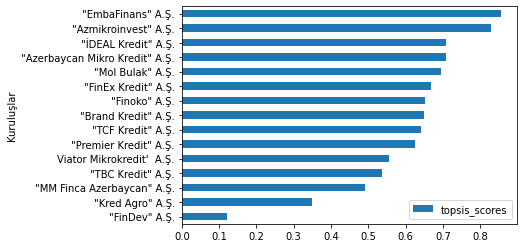

In [15]:
# Finding scores
Ideal_distance = pd.Series(Ideal_distance)
Neg_distance = pd.Series(Neg_distance)
score = pd.Series(Neg_distance/(Neg_distance+Ideal_distance), name='topsis_scores')
scores = pd.concat([df2, score], axis=1)
print(scores,'\n')
scores.set_index('Kuruluşlar').sort_values('topsis_scores', ascending=True).plot.barh();

## With Function

In [16]:
all = []
def data(dataset,*args):
    # Normalization
    dataset1=dataset._get_numeric_data()
    dataset2=dataset.drop(dataset._get_numeric_data(), axis=1)
    df_n = np.array(dataset1/np.sqrt((dataset1**2).sum()))
    # Multiply by the coefficient('CRITIC' method)
    a = []
    for i in dataset1.columns:
        if i in args:
            a.append((dataset1[i].max()-dataset1[i])/(dataset1[i].max()-dataset1[i].min()))
        else:
            a.append((dataset1[i]-dataset1[i].min())/(dataset1[i].max()-dataset1[i].min()))
    df = pd.DataFrame(a).T
    df_crc = (df.std()*(1-df.corr()).sum())/(df.std()*(1-df.corr()).sum()).sum()
    for i in range(len(df_n)):
        df_n[i]=df_n[i]*df_crc
    # Ideal and Negative Ideal weight
    ideal, neg_ideal = df_n.max(axis=0), df_n.min(axis=0)
    z = pd.DataFrame({'ideal':ideal,'neg_ideal':neg_ideal}, index=dataset1.columns)
    for i in args:
        z['ideal'][i],z['neg_ideal'][i]=z['neg_ideal'][i],z['ideal'][i]
    # Distance to Ideal and Negative Ideal Points
    Ideal_distance = []
    Neg_distance = []
    for i in range(len(df_n)):
        Ideal_distance.append(np.sqrt(((df_n-np.array(z['ideal']))**2)[i].sum()))
        Neg_distance.append(np.sqrt(((df_n-np.array(z['neg_ideal']))**2)[i].sum()))
    # Finding scores
    Ideal_distance, Neg_distance = pd.Series(Ideal_distance), pd.Series(Neg_distance)
    score = pd.Series(Neg_distance/(Neg_distance+Ideal_distance), name='topsis_scores')
    all.append(score)
    scores = pd.concat([dataset2, score], axis=1)
    print(f'{14*" "}"CRITIC" WEIGHT VALUES\n\n',df_crc,'\n\n',f'{18*" "}TOPSIS SCORES\n\n',scores,'\n')
    scores.set_index(scores.columns[0]).sort_values('topsis_scores', ascending=True).plot.barh(grid = True);

              "CRITIC" WEIGHT VALUES

 ROA                                   0.110840
ROE                                   0.165863
ÖzKaynaklar / Toplam Varlıklar        0.127138
Finansal Kaldıraç Oranı               0.127138
Finansman Oranı                       0.144975
VÖK / Aktif toplam                    0.107668
Net faiz gelirleri/Toplam Aktifler    0.112812
Faiz Karşılama Oranı                  0.103567
dtype: float64 

                   TOPSIS SCORES

                         Kuruluşlar  topsis_scores
0   "Azerbaycan Mikro Kredit" A.Ş.       0.708803
1                "TCF Kredit" A.Ş.       0.642059
2             "Azmikroinvest" A.Ş.       0.829629
3                "EmbaFinans" A.Ş.       0.855035
4              "Brand Kredit" A.Ş.       0.648286
5              "FinEx Kredit" A.Ş.       0.667409
6       "MM Finca Azerbaycan" A.Ş.       0.491084
7                    "Finoko" A.Ş.       0.651687
8              "İDEAL Kredit" A.Ş.       0.709059
9                    "FinDev" A.Ş

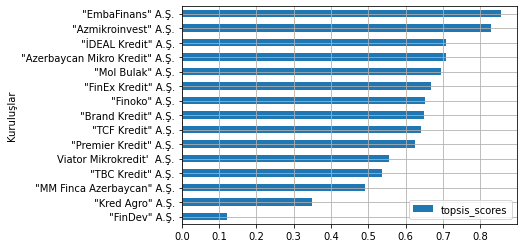

In [17]:
data(df2016,'Finansal Kaldıraç Oranı')

              "CRITIC" WEIGHT VALUES

 ROA                                   0.092446
ROE                                   0.091574
Öz Kaynaklar / Toplam Varlıklar       0.151219
Finansal Kaldıraç Oranı               0.151219
Finansman Oranı                       0.146435
VÖK / Aktif toplam                    0.099037
Net faiz gelirleri/Toplam Aktifler    0.155560
Faiz Karşılama Oranı                  0.112511
dtype: float64 

                   TOPSIS SCORES

                         Kuruluşlar  topsis_scores
0   "Azerbaycan Mikro Kredit" A.Ş.       0.448843
1                "TCF Kredit" A.Ş.       0.166019
2             "Azmikroinvest" A.Ş.       0.405393
3                "EmbaFinans" A.Ş.       0.363072
4              "Brand Kredit" A.Ş.       0.190928
5              "FinEx Kredit" A.Ş.       0.271490
6       "MM Finca Azerbaycan" A.Ş.       0.629324
7                    "Finoko" A.Ş.       0.249641
8              "İDEAL Kredit" A.Ş.       0.301351
9                    "FinDev" A.Ş

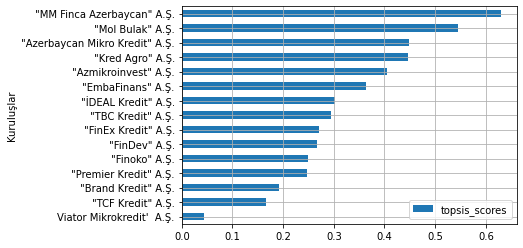

In [18]:
data(df2017,'Finansal Kaldıraç Oranı')

              "CRITIC" WEIGHT VALUES

 ROA                                   0.078420
ROE                                   0.104137
Öz Kaynaklar / Toplam Varlıklar       0.143591
Finansal Kaldıraç Oranı               0.143591
Finansman Oranı                       0.148305
VÖK / Aktif toplam                    0.088186
Net faiz gelirleri/Toplam Aktifler    0.124159
Faiz Karşılama Oranı                  0.169611
dtype: float64 

                   TOPSIS SCORES

                         Kuruluşlar  topsis_scores
0   "Azerbaycan Mikro Kredit" A.Ş.       0.478245
1                "TCF Kredit" A.Ş.       0.038353
2             "Azmikroinvest" A.Ş.       0.405249
3                "EmbaFinans" A.Ş.       0.392547
4              "Brand Kredit" A.Ş.       0.351139
5              "FinEx Kredit" A.Ş.       0.345140
6       "MM Finca Azerbaycan" A.Ş.       0.548295
7                    "Finoko" A.Ş.       0.342239
8              "İDEAL Kredit" A.Ş.       0.360273
9                    "FinDev" A.Ş

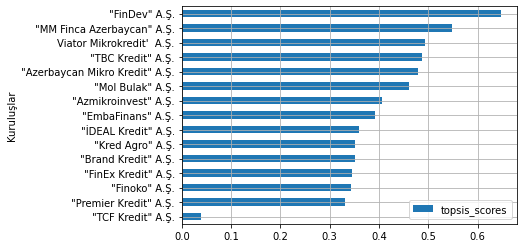

In [19]:
data(df2018,'Finansal Kaldıraç Oranı')

              "CRITIC" WEIGHT VALUES

 ROA                                   0.107639
ROE                                   0.099986
Öz Kaynaklar / Toplam Varlıklar       0.119569
Finansal Kaldıraç Oranı               0.119569
Finansman Oranı                       0.182365
VÖK / Aktif toplam                    0.105970
Net faiz gelirleri/Toplam Aktifler    0.136060
Faiz Karşılama Oranı                  0.128842
dtype: float64 

                   TOPSIS SCORES

                         Kuruluşlar  topsis_scores
0   "Azerbaycan Mikro Kredit" A.Ş.       0.474300
1                "TCF Kredit" A.Ş.       0.009054
2             "Azmikroinvest" A.Ş.       0.564404
3                "EmbaFinans" A.Ş.       0.331779
4              "Brand Kredit" A.Ş.       0.283952
5              "FinEx Kredit" A.Ş.       0.296148
6       "MM Finca Azerbaycan" A.Ş.       0.631802
7                    "Finoko" A.Ş.       0.277017
8              "İDEAL Kredit" A.Ş.       0.319554
9                    "FinDev" A.Ş

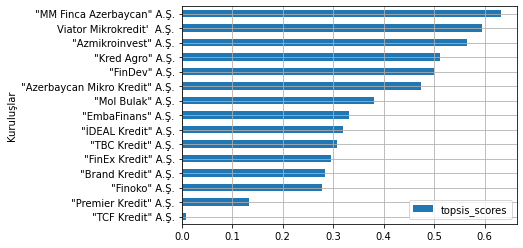

In [20]:
data(df2019,'Finansal Kaldıraç Oranı')

              "CRITIC" WEIGHT VALUES

 ROA                                   0.129685
ROE                                   0.148440
Öz Kaynaklar / Toplam Varlıklar       0.142365
Finansal Kaldıraç Oranı               0.142365
Finansman Oranı                       0.104299
VÖK / Aktif toplam                    0.119031
Net faiz gelirleri/Toplam Aktifler    0.111956
Faiz Karşılama Oranı                  0.101859
dtype: float64 

                   TOPSIS SCORES

                         Kuruluşlar  topsis_scores
0   "Azerbaycan Mikro Kredit" A.Ş.       0.213551
1                "TCF Kredit" A.Ş.       0.557323
2             "Azmikroinvest" A.Ş.       0.731392
3                "EmbaFinans" A.Ş.       0.558540
4              "Brand Kredit" A.Ş.       0.586716
5              "FinEx Kredit" A.Ş.       0.474290
6       "MM Finca Azerbaycan" A.Ş.       0.492481
7                    "Finoko" A.Ş.       0.419679
8              "İDEAL Kredit" A.Ş.       0.589009
9                    "FinDev" A.Ş

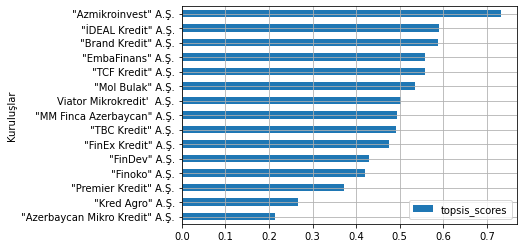

In [21]:
data(df2020,'Finansal Kaldıraç Oranı')

# All Scores and Visualizations

In [22]:
all = pd.DataFrame(all).T.set_index(df2016['Kuruluşlar'])
all.columns = ['2016','2017','2018','2019','2020']

In [23]:
all

,2016,2017,2018,2019,2020
Kuruluşlar,,,,,
"""Azerbaycan Mikro Kredit"" A.Ş.",0.708803,0.448843,0.478245,0.474300,0.213551
"""TCF Kredit"" A.Ş.",0.642059,0.166019,0.038353,0.009054,0.557323
"""Azmikroinvest"" A.Ş.",0.829629,0.405393,0.405249,0.564404,0.731392
"""EmbaFinans"" A.Ş.",0.855035,0.363072,0.392547,0.331779,0.558540
"""Brand Kredit"" A.Ş.",0.648286,0.190928,0.351139,0.283952,0.586716
"""FinEx Kredit"" A.Ş.",0.667409,0.271490,0.345140,0.296148,0.474290
"""MM Finca Azerbaycan"" A.Ş.",0.491084,0.629324,0.548295,0.631802,0.492481
"""Finoko"" A.Ş.",0.651687,0.249641,0.342239,0.277017,0.419679
"""İDEAL Kredit"" A.Ş.",0.709059,0.301351,0.360273,0.319554,0.589009


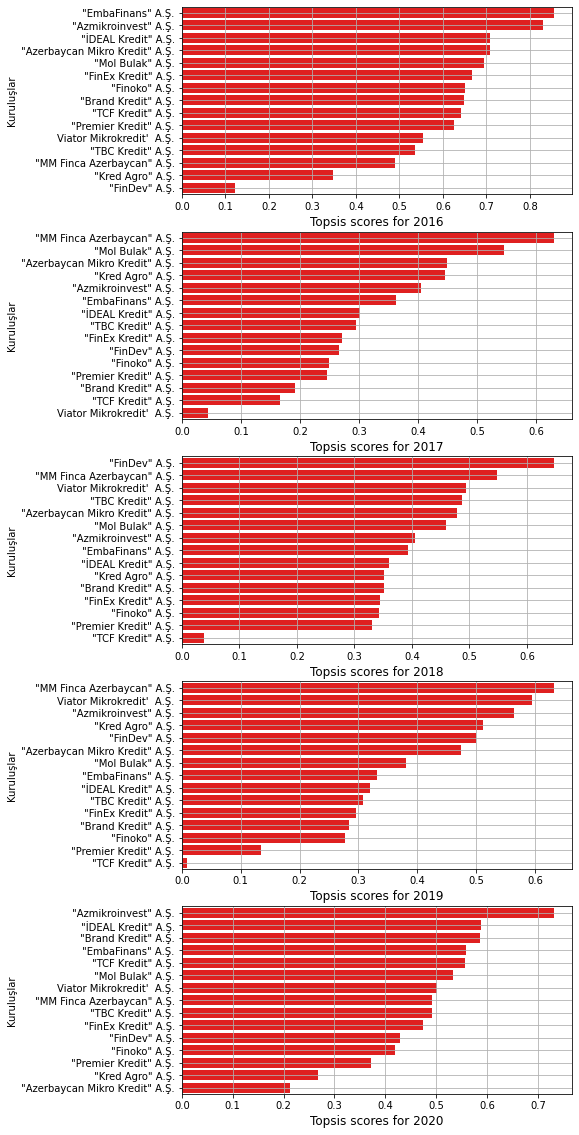

In [24]:
a = 1
plt.figure(figsize=(7,20))
for i in all.columns:
    all = all.sort_values(i, ascending=False)
    plt.subplot(5,1,a)
    sns.barplot(x=i, y=all.index ,color='r',data=all);
    plt.xlabel(f'Topsis scores for {i}', size=12)
    plt.grid()
    a+=1

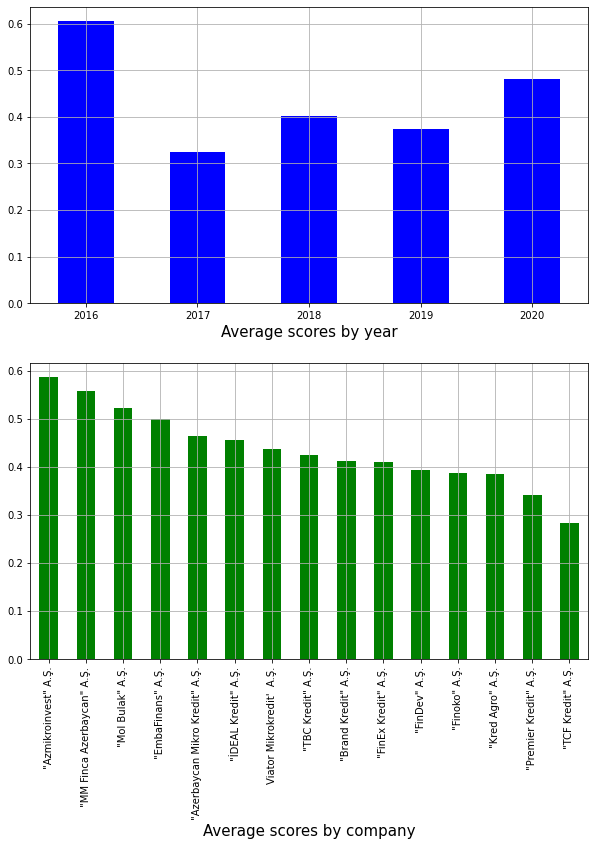

In [25]:
plt.figure(figsize=(10,12))
plt.subplot(2,1,1)
all.mean().plot(kind='bar', grid = True, color='blue');
plt.xlabel('Average scores by year', size=15)
plt.xticks(rotation=0)
plt.subplot(2,1,2)
all.T.mean().sort_values(ascending = False).plot(kind='bar', grid = True, color='green')
plt.xlabel('Average scores by company', size=15);